<a href="https://colab.research.google.com/github/ProfAI/machine-learning-fondamenti/blob/main/6%20-%20Clustering/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# L'algoritmo K-means

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams["figure.figsize"] = (16,10)
sns.set_theme()

In [3]:
RANDOM_SEED = 2

### Generiamo i dati

<Axes: >

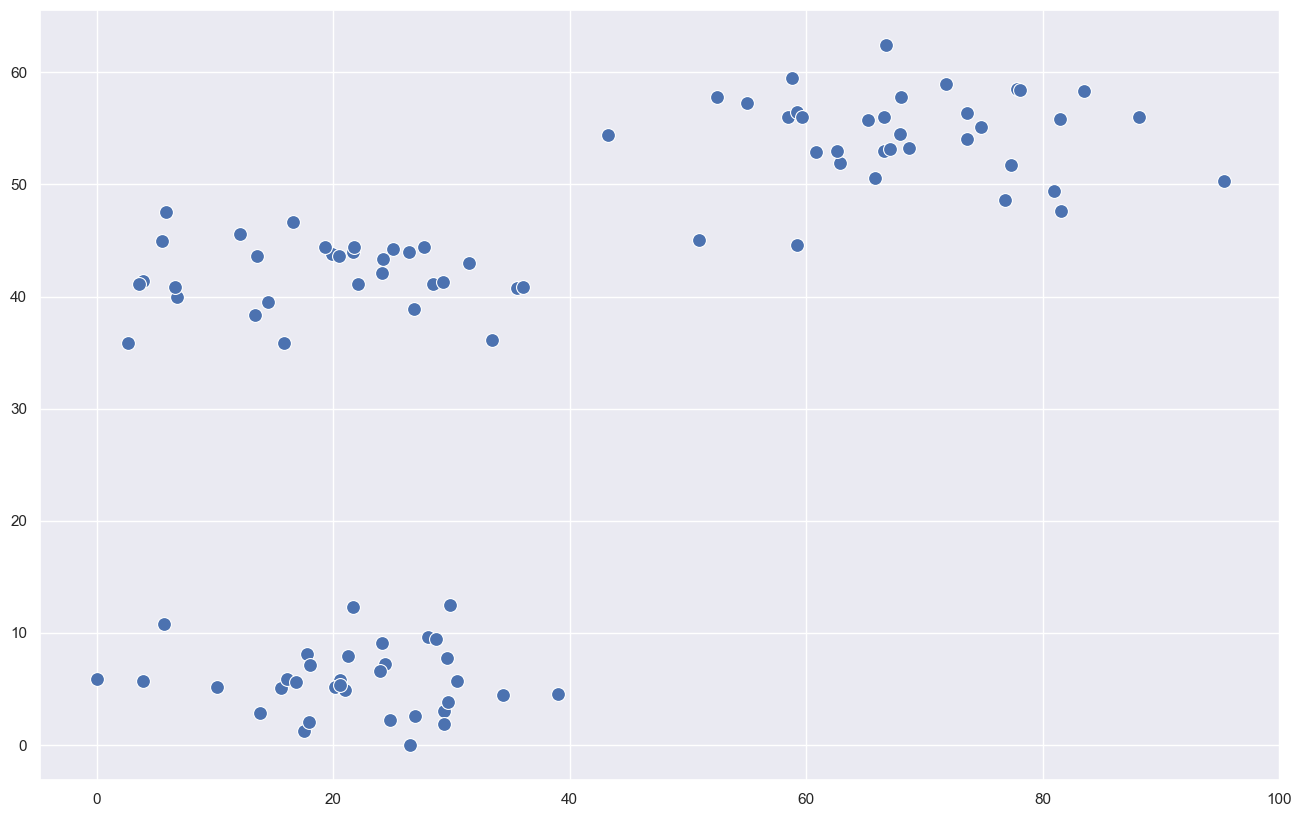

In [4]:
X, _ = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=0.5, random_state=RANDOM_SEED)
X[:,0] = (X[:,0]-X[:,0].min())*20
X[:,1] = (X[:,1]-X[:,1].min())*6 

sns.scatterplot(x=X[:,0], y=X[:,1], s=100)

### Creiamo il modello

In [5]:
from sklearn.cluster import KMeans
from scipy.cluster.vq import vq
from time import time

In [6]:
kmeans = KMeans(n_clusters=3, random_state=RANDOM_SEED)
tick = time()
kmeans.fit(X)
print(f"Modello addestrato in {time()-tick:.5f} secondi" )

Modello addestrato in 0.09483 secondi


/Users/andrea/opt/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
kmeans = KMeans(n_clusters=3, random_state=RANDOM_SEED, init="k-means++")
tick = time()
kmeans.fit(X)
print(f"Modello addestrato in {time()-tick:.5f} secondi" )

Modello addestrato in 0.02587 secondi


/Users/andrea/opt/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Valutiamo il modello

In [8]:
from scipy.spatial.distance import cdist


In [9]:
distorsion = sum(np.square(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1))) / X.shape[0]
distorsion

107.41040694974288

In [10]:
inertia = sum(np.square(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)))
inertia

10741.040694974288

In [11]:
kmeans.inertia_

10741.040694974286

### Visualizziamo i cluster

In [12]:
y_kmeans = kmeans.predict(X)

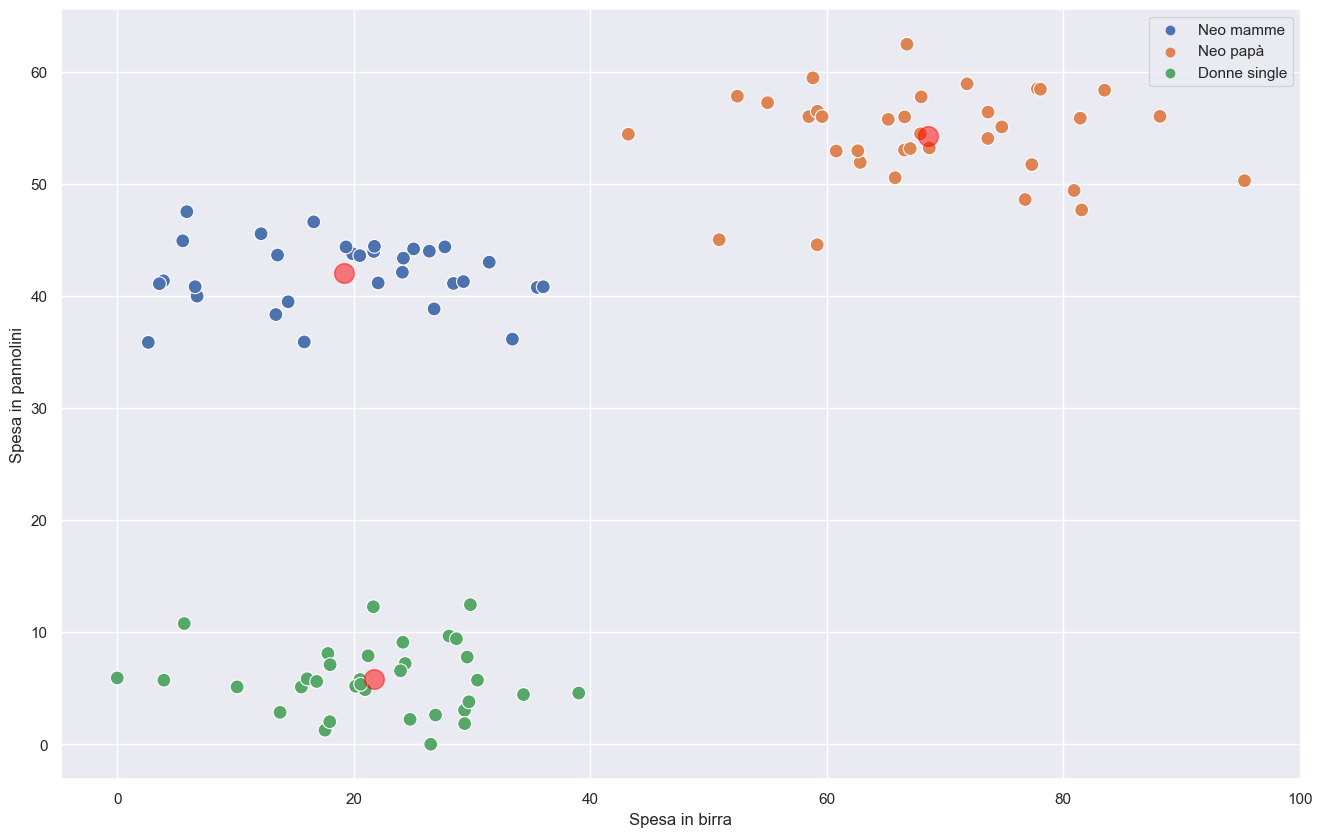

In [13]:
L = {0:"Donne single",1:"Neo papà",2:"Neo mamme"}
vfunc = np.vectorize(lambda x: L[x])
labels = vfunc(y_kmeans)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels, s=100)
plt.xlabel("Spesa in birra")
plt.ylabel("Spesa in pannolini")

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

In [16]:
ssd = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init="auto").fit(X)
    ssd[k] = kmeans.inertia_

ssd

{1: 106907.67527213426,
 2: 32112.174288799484,
 3: 10741.040694974286,
 4: 8300.677050120099,
 5: 5707.015400474256,
 6: 4229.415670259561,
 7: 3591.8104659125424,
 8: 3011.186026091862,
 9: 2668.956495081113}

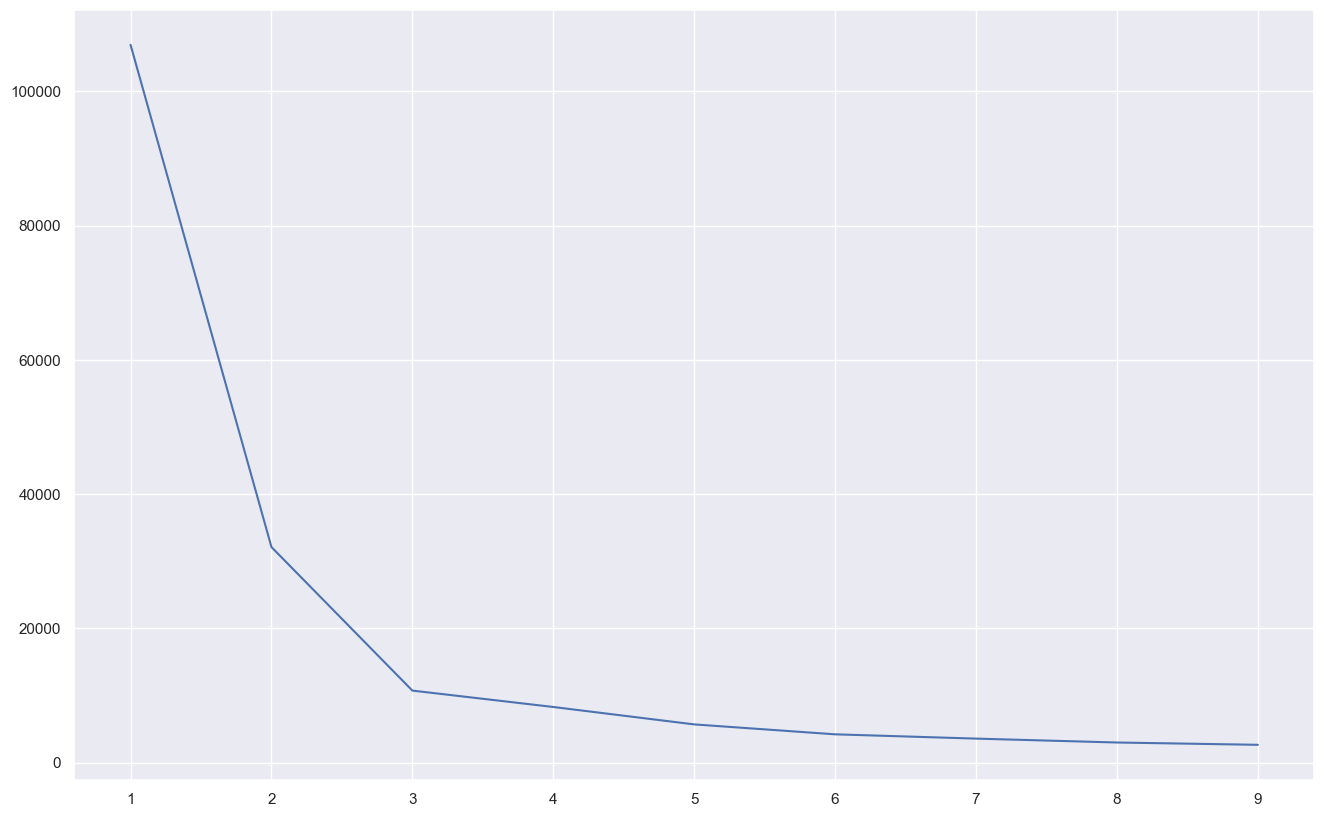

In [18]:
plt.plot(list(ssd.keys()), list(ssd.values()))